In [10]:
from sympy import *
from IPython.display import *
init_printing()
var('a:z')
var('A:Z');

In [11]:
V=z-z**2/2
Z=solve(V-v,z)[0]
Z

In [12]:
N=8
p=[]
f=series(exp(x*Z),v,0,N)
for i in range(N):
    p.append(factorial(i)*f.coeff(v,i))
p

In [13]:
N=8
q=[]
f=series(exp(y*V),z,0,N)
for i in range(N):
    q.append(factorial(i)*f.coeff(z,i))
q

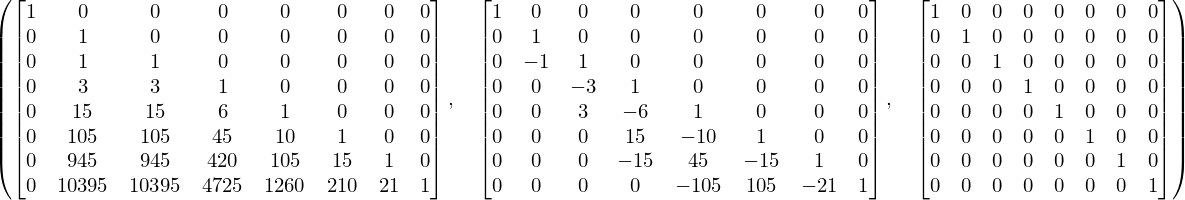

In [14]:
PCF=Matrix(N,N,lambda n,k: p[n].coeff(x,k))
QCF=Matrix(N,N,lambda n,k: q[n].coeff(y,k))
PCF,QCF,simplify(PCF*QCF)

In [15]:
qa=[]
for n in range(N):
    qa.append(bool(sum(p[n-k]*p[k].subs(x,y)*binomial(n,k) for k in range(n+1)).expand()-p[n].subs(x,x+y).expand()==0))
qa    

[True, True, True, True, True, True, True, True]

In [16]:
W=[]
WW=[]
for n in range(N):
    W.append(zeros(N,N))
    WW.append(zeros(N,N))
    for k in range(floor(N/2)):
        for l in range(floor(N/2)):
            W[n][k,l]=sum(binomial(n,j)*PCF[n-j,k]*PCF[j,l] for j in range(n+1))
            WW[n][k,l]=PCF[n,k+l]*binomial(k+l,l)
[(W[a]-WW[a]).is_zero for a in range(N)]

[True, True, True, True, True, True, True, True]

In [17]:
for i in range(N):
    display([p[i],q[i]])

In [18]:
yy=[]
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+p[m].coeff(x,i)*q[i]
    yy.append(simplify(g))    

display(yy)
    
xx=[]    
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+q[m].coeff(y,i)*p[i] 
    xx.append(simplify(g))
    
display(xx)    

In [39]:
display([(sum(gamma(n+k)/gamma(n-k)/2**k/factorial(k)*x**(n-k) for k in range(n+1))-p[n]) for n in range(1,N)])
[simplify(sum(binomial(n,2*j)*factorial(2*j)/2**j/factorial(j)*(-1)**j*y**(n-j) for j in range(n+1))-q[n]) for n in range(N)]

Bessel polynomials
$$ x\theta_{n-1}(x)=\sum_{k=0}^{n-1} \frac{\Gamma(n+k)\hphantom{kk}}{\Gamma(n-k)\,k!}\frac{x^{n-k}}{2^k}$$

Hermite polynomials
$$ He_n(x,xt)=\sum_{k=0}^{\lfloor n/2 \rfloor} \binom{n}{2k}\,\frac{(2k)!}{2^k\,k!}(-1)^k x^{n-k}t^k$$

In [56]:
B=p
%store B

Stored 'B' (list)
